# Trabajo práctico integrador - Análisis de datos
## Carrera de Especialización En Inteligencia Artificial - Cohorte 17
### Autores:
* Horn, Martin
* Lloveras, Alejandro
* Méndez, Diego Martín
* Micozzi, María Luz

El dataset contiene más de 30000 registros de canciones de Spotify de 6 categorias (EDM, Latin, Pop, R&B, Rap y Rock) tomados por medio de la API de Spotify.

El dataset cuenta con información actualizada a fines del 2023.

Nos centraremos en el campo track_popularity y buscaremos su relación con otros campos que describen las características musicales como: key, tempo, danceability, energy, etc.; o el género/subgénero y año de lanzamiento.

### Campos:

| Variable                  | Descripción                                                                                                                                                                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| `track_id`                | ID único de la canción                                                                                                                                                                                                                          |
| `track_name`              | Nombre de la canción                                                                                                                                                                                                                             |
| `track_artist`            | Artista de la canción                                                                                                                                                                                                                            |
| `track_popularity`        | Popularidad de la canción (0-100), donde un valor más alto indica una mayor popularidad                                                                                                                                                         |
| `track_album_id`          | ID único del álbum                                                                                                                                                                                                                               |
| `track_album_name`        | Nombre del álbum de la canción                                                                                                                                                                                                                  |
| `track_album_release_date`| Fecha de lanzamiento del álbum                                                                                                                                                                                                                   |
| `playlist_name`           | Nombre de la lista de reproducción                                                                                                                                                                                                              |
| `playlist_id`             | ID de la lista de reproducción                                                                                                                                                                                                                   |
| `playlist_genre`          | Género de la lista de reproducción                                                                                                                                                                                                               |
| `playlist_subgenre`       | Subgénero de la lista de reproducción                                                                                                                                                                                                            |
| `danceability`            | Describe qué tan adecuada es una pista para bailar, basándose en una combinación de elementos musicales. Un valor de 0.0 es menos bailable y 1.0 es más danceable.                                                            |
| `energy`                  | La energía es una medida de 0.0 a 1.0 y representa una medida perceptual de intensidad y actividad. Típicamente, las pistas energéticas se sienten rápidas y ruidosas.                                                                 |
| `key`                     | La tonalidad general estimada de la pista. Los enteros se asignan a notas utilizando la notación estándar de Clase de Tonos. Ej. 0 = C, 1 = C♯/D♭, 2 = D, y así sucesivamente. Si no se detecta tonalidad, el valor es -1.                          |
| `loudness`                | La sonoridad general de una pista en decibelios (dB). Los valores típicos oscilan entre -60 y 0 dB.                                                                                     |
| `mode`                    | El modo indica la modalidad (mayor o menor) de una pista. Mayor está representado por 1 y menor por 0.                                                                                  |
| `speechiness`             | La presencia de palabras habladas en una pista. Los valores por encima de 0.66 describen pistas que probablemente están hechas completamente de palabras habladas.                                                                           |
| `acousticness`            | Una medida de confianza de 0.0 a 1.0 sobre si la pista es acústica. 1.0 representa una alta confianza en que la pista es acústica.                                                     |
| `instrumentalness`        | Predice si una pista no contiene voces. Valores por encima de 0.5 están destinados a representar pistas instrumentales.                                                                  |
| `liveness`                | Detecta la presencia de una audiencia en la grabación. Un valor superior a 0.8 proporciona una alta probabilidad de que la pista sea en vivo.                                          |
| `valence`                 | Una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enojadas). |
| `tempo`                   | El tempo estimado general de una pista en beats por minuto (BPM).                                                                                                                      |
| `duration_ms`             | Duración de la canción en milisegundos                                                                                                                                                                                                          |


In [96]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [97]:
# leer CSV
df = pd.read_csv('spotify_songs.csv')

## Exploración y Comprensión de los Datos

In [98]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [100]:
df.head(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [101]:
df.sample(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
15293,7nemcVsXVFZF01iqpIIo2Y,It's a Long Way to the Top (If You Wanna Rock ...,AC/DC,70,19AUoKWRAaQYrggVvdQnqq,High Voltage,1976-05-14,HARD ROCK CAFE,55ybnG2z8rpTIerRfnCsw6,rock,hard rock,0.456,0.863,3,-3.551,1,0.0894,0.1330,0.0545,0.0553,0.532,135.966,301227
17616,4500Dr4dVfnQiMjaTC4oIq,Me Equivocaré,Antonio José,69,3kJtYTn44STQqsO6A1vF2b,Me Equivocaré,2019-09-26,Latin Pop VIP,37i9dQZF1DX1QnNyJOBQBv,latin,latin pop,0.563,0.729,2,-4.178,1,0.1600,0.0623,0.0000,0.0378,0.726,80.510,152722
25511,3wH3TWKBA9NCZinuBidD21,Mellow,Pete Philly & Perquisite,35,7jlGRCzUvTDKA96ivxTytk,Mindstate,2005-04-18,Neo Soul / Modern Jazz / Smooth Hiphop,07SNJ4MwYba9wwmzrbjmYi,r&b,neo soul,0.843,0.310,1,-12.206,0,0.0904,0.4930,0.2750,0.1110,0.321,101.995,388947


In [102]:
df.tail(3)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.150,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.343,0.3080,128.008,367432
32832,29zWqhca3zt5NsckZqDf6c,Typhoon - Original Mix,Julian Calor,27,0X3mUOm6MhxR7PzxG95rAo,Typhoon/Storm,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.603,0.884,5,-4.571,0,0.0385,0.000133,0.341000,0.742,0.0894,127.984,337500


### Comprensión de features musicales del dataset

Exploramos los valores máximos y minimos de features específicos, aprovechando la posibilidad de buscar las canciones en Spotify para escucharlas.

In [103]:
# Speechiness
max_speechiness = df['speechiness'].max()

# Obtenemos las canciones con el valor maximo de 'speechiness'
tracks_with_max_speechiness = df[df['speechiness'] == max_speechiness]

tracks_with_max_speechiness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
25705,5ZbJR1AfdOsvsYNuCvgqKX,I'M DEAD,Duckwrth,59,1JqHKxNhfBv3ZIz1VwhENp,I'M UUGLY,2016-09-23,Groovy // Funky // Neo-Soul,0JmBB9HfrzDiZoPVRdv8ns,r&b,neo soul,0.593,0.751,4,-9.414,0,0.918,0.707,0.0,0.356,0.485,114.907,230632


Se aprecia que la variable 'speechiness' describe canciones con gran presencia de la voz (generalmente rapeadas).

In [104]:
# Acousticness
min_acousticness = df['acousticness'].min()

# Obtenemos las canciones con el valor maximo de 'acousticness'
tracks_with_min_acousticness = df[df['acousticness'] == min_acousticness]

tracks_with_min_acousticness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


In [105]:
# Instrumentalness
min_instrumentalness = df['instrumentalness'].min()

# Obtenemos las canciones con el valor maximo de 'instrumentalness'
tracks_with_min_instrumentalness = df[df['instrumentalness'] == min_instrumentalness]

tracks_with_min_instrumentalness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.10200,0.0,0.0653,0.518,122.036,194754
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.08030,0.0,0.0833,0.725,123.976,189052
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,8,-5.385,1,0.1270,0.07990,0.0,0.1430,0.585,124.982,163049
6,2OAylPUDDfwRGfe0lYqlCQ,Never Really Over - R3HAB Remix,Katy Perry,62,7INHYSeusaFlyrHSNxm8qH,Never Really Over (R3HAB Remix),2019-07-26,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.449,0.856,5,-4.788,0,0.0623,0.18700,0.0,0.1760,0.152,112.648,187675
9,1IXGILkPm0tOCNeq00kCPa,If I Can't Have You - Gryffin Remix,Shawn Mendes,67,4QxzbfSsVryEQwvPFEV5Iu,If I Can't Have You (Gryffin Remix),2019-06-20,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.642,0.818,2,-4.552,1,0.0320,0.05670,0.0,0.0919,0.590,124.957,253040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32802,3Gwq0zKnMWluOEPKh93BeC,Lost At Sea,Zedd,51,7juWTdmjo0vYywWu8HiQxs,Clarity,2012-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.567,0.796,6,-3.534,1,0.0364,0.02470,0.0,0.1240,0.305,127.983,225840
32811,353JGhRW6ahVU3DpCxOjqW,Utopia - Radio Edit,Qubicon,11,466ziBbv68mP56uJom8uSL,Utopia,2014-03-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.490,0.866,7,-3.152,1,0.0406,0.01820,0.0,0.1060,0.185,127.998,219844
32813,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,Borgeous,0,3NArAQULJ5BMoR8YY5UdWA,Invincible,2014-02-03,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.613,0.775,6,-4.040,0,0.0409,0.00678,0.0,0.0677,0.391,127.906,204609
32827,0aBDrRTgDCwWbcOnEIp7DJ,Many Ways - Radio Edit,Ferry Corsten feat. Jenny Wahlstrom,27,59XOfNjuYZB6feC6QUzS3e,Many Ways,2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.581,0.640,5,-8.367,1,0.0365,0.02660,0.0,0.5720,0.288,128.001,196993


In [106]:
# Liveness
max_liveness = df['liveness'].max()

# Obtenemos las canciones con el valor maximo de 'liveness'
tracks_with_max_liveness = df[df['liveness'] == max_liveness]

tracks_with_max_liveness

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11296,2da7wnI5OoV89TsdKMM81k,Knockin' On Heaven's Door - Live In London / 1992,Guns N' Roses,50,3ZwjaVcnVo2TwhK8N8WWVs,Live Era '87-'93,1999-01-01,This Is Guns N' Roses,37i9dQZF1DX74DnfGTwugU,rock,album rock,0.271,0.891,6,-6.011,1,0.0824,0.00188,0.0157,0.996,0.365,147.509,447160


In [107]:
# Valence
max_valence = df['valence'].min()

# Obtenemos las canciones con el valor maximo de 'valence'
tracks_with_max_valence = df[df['valence'] == max_valence]

tracks_with_max_valence

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
11363,51w6nRCU68klqNfYaaVP2j,"Hi, How're You Doin'?",DREAMS COME TRUE,0,4wdK52JVu5GzhxW3RCZ3AV,Dreams Come True,1989-03-21,City Pop 1985 シティーポップ,3j2osvmecEao5nmo9jZ5df,rock,album rock,0.0,0.315,1,-26.087,1,0.0,0.0,0.0,0.0,0.0,0.0,4000


## Técnicas de Visualización

KeyboardInterrupt: 

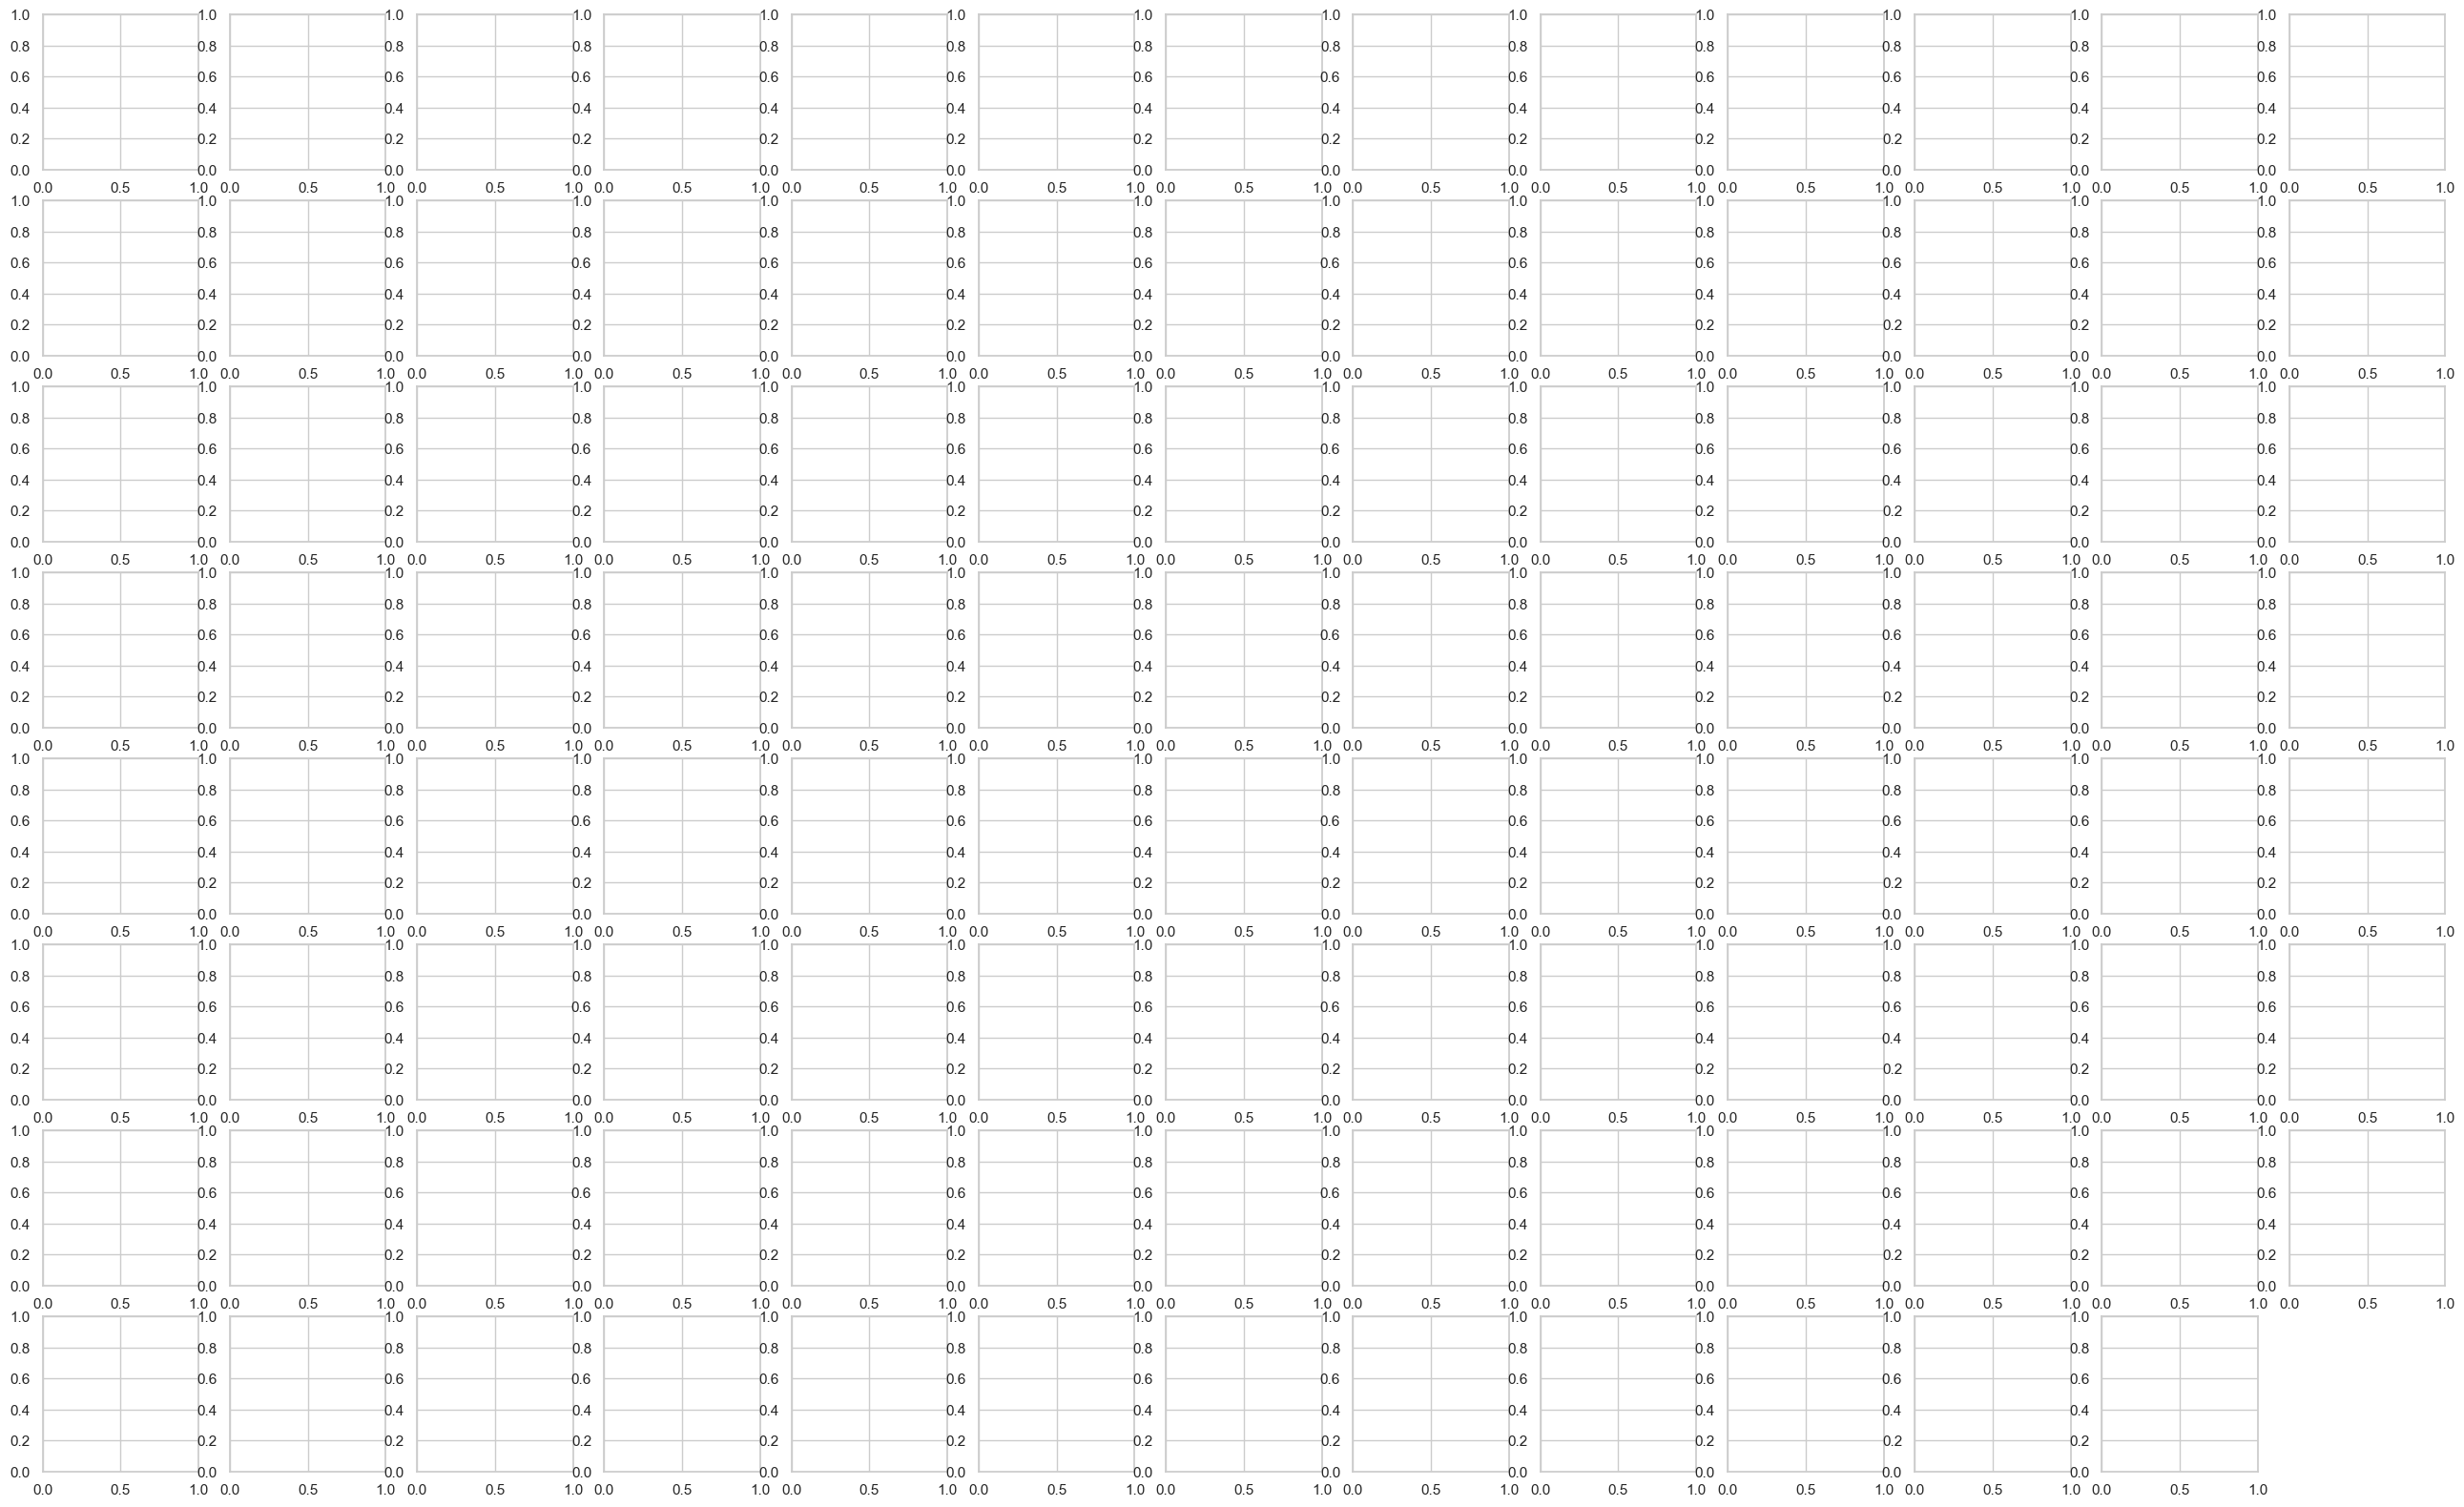

In [108]:
sns.pairplot(df)
plt.show()

Puede apreciarse que algunos features poseen gran cantidad de outliers. También es notable un sesgo en la distribución de ciertos features.

Nos interesa ver específicamente la relación entre 'track_popularity' y distintas features musicales.

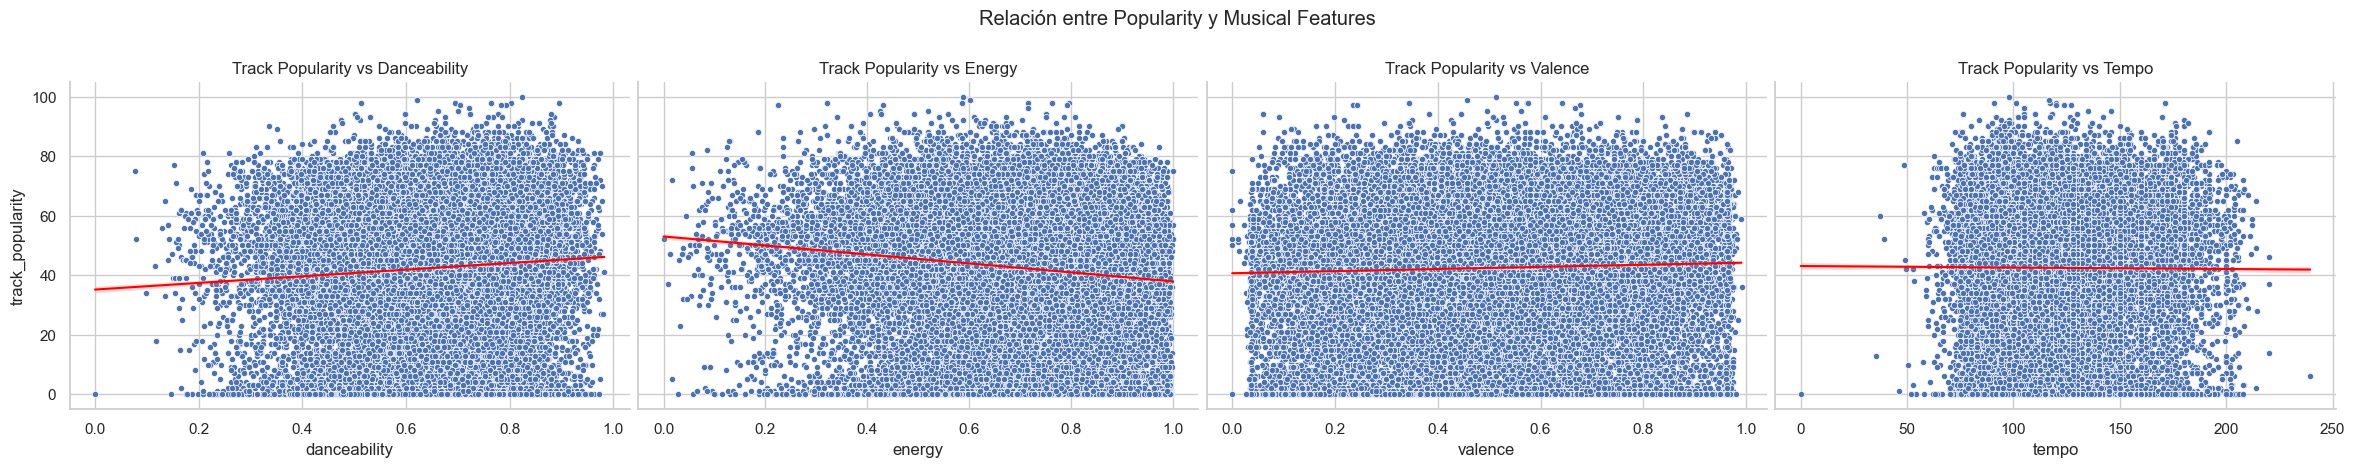

In [79]:
pp = sns.pairplot(df,
                 x_vars=['danceability', 'energy', 'valence', 'tempo'],
                 y_vars='track_popularity',
                 height=4,
                 aspect=1.5,  # Aspect ratio para agrandar los gráficos
                 kind='scatter',  # Scatter plot
                 plot_kws={'s': 20, 'edgecolor': 'w', 'linewidth': 0.5}
)

# Agregamos líneas de regresión
for ax in pp.axes.flat:
    sns.regplot(
        x=ax.collections[0].get_offsets()[:, 0],
        y=ax.collections[0].get_offsets()[:, 1],
        ax=ax,
        scatter=False,
        color='red',
        line_kws={'linewidth': 1.5}
    )

# Leyenda
for ax, feature in zip(pp.axes.flat, ['Danceability', 'Energy', 'Valence', 'Tempo']):
    ax.set_title(f'Track Popularity vs {feature}')
plt.suptitle('Relación entre Popularity y Musical Features', y=1.15)

plt.show()

Puede apreciarse que en todos los casos la correlación es muy baja. Puede concluirse que ni el Tempo ni la Valencia (positividad musical transmitida) tienen influencia sobre la popularidad.

Para 'Danceability' (musica bailable) y 'Energy' se aprecia una mínima correlación, pero no llega a ser determinante.

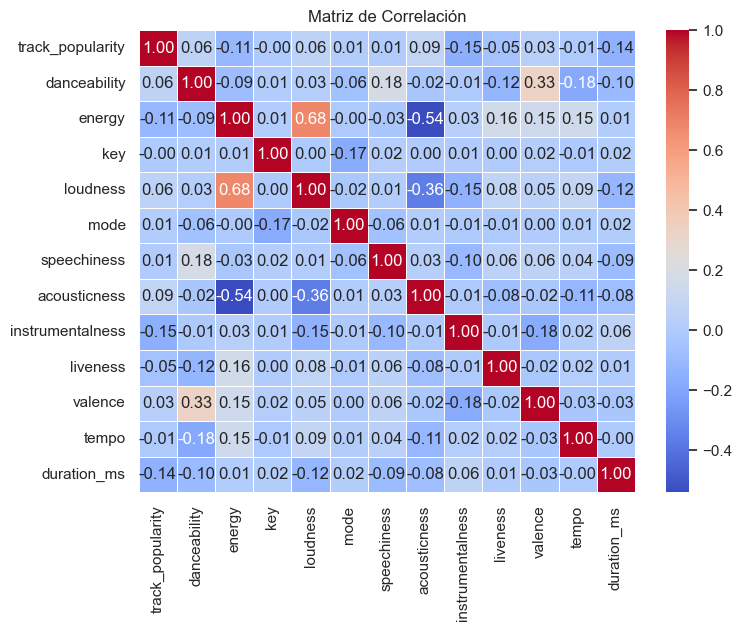

In [80]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Corroboramos la baja correlación entre la  mayoría de los features.

En los casos que se aprecia una correlación mayor (loudness/energy, acousticness/energy, loudness/acousticness), se trata de variables sintéticas, construidas en función de 'loudness' (parámetro acústico) y otras características del audio.

En el caso de 'valence/danceability' expresa una relación entre la música bailable y la "positividad" transmitida por la pista.

Podemos ver que 'track_popularity' presenta una baja correlación con todas las variables.
Sólo se aprecia una relación levemente mayor para: instrumentalness, duration_ms y energy.

Hipótesis:
- Relación 'instrumentalness/track_popularity': la música cantada (no instrumental) suele ser levemente más popular.
- Relación 'duration_ms/track_popularity': tienden a preferirse las canciones de una duración corta.
- Relación 'energy/track_popularity': a igualdad de condiciones, la pista con mayor volumen es preferida por los oyentes.

Cabe destacar que todas estas correlaciones son mínimas (menores a +/- 0.15).



En el pairplot se observó que algunos valores se encontraban con una distribución sesgada, por lo cual decidimos analizarlos en detalle.

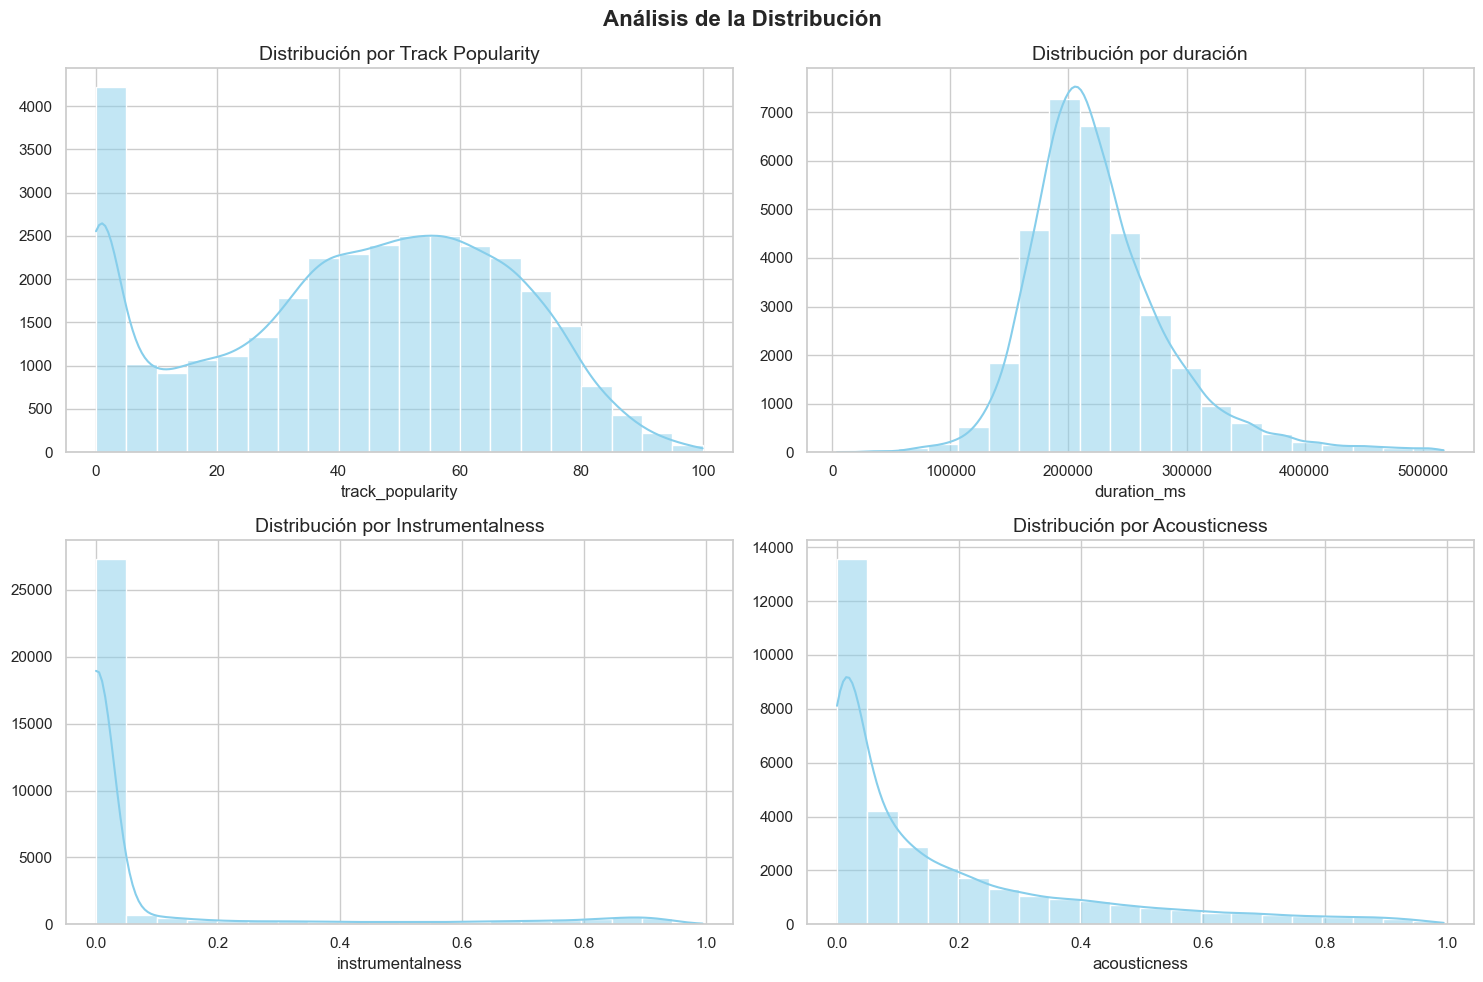

In [82]:
# Análisis de la distribución

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.set(style="whitegrid")
plt.title('Variables con igual rango (0 a 1)', fontsize=14)

# Graficamos la distribución del campo track_popularity
sns.histplot(data=df, x='track_popularity', bins=20, kde=True, color="skyblue", ax=axes[0, 0])
axes[0, 0].set_title('Distribución por Track Popularity', fontsize=14)
axes[0, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='duration_ms', bins=20, kde=True, color="skyblue", ax=axes[0, 1])
axes[0, 1].set_title('Distribución por duración', fontsize=14)
axes[0, 1].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='instrumentalness', bins=20, kde=True, color="skyblue", ax=axes[1, 0])
axes[1, 0].set_title('Distribución por Instrumentalness', fontsize=14)
axes[1, 0].set_ylabel('')

# Graficamos la distribución del campo acousticness
sns.histplot(data=df, x='acousticness', bins=20, kde=True, color="skyblue", ax=axes[1, 1])
axes[1, 1].set_title('Distribución por Acousticness', fontsize=14)
axes[1, 1].set_ylabel('')

plt.suptitle('Análisis de la Distribución', fontsize=16, fontweight='bold')
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

Existe un gran número de pistas con 'track_popularity' cercano a 0. Posiblemente porque no han sido rankeadas por falta de escuchas.

La mayoría de las canciones tienen una duración de 3 min 20 seg. Casi no hay pistas por debajo de 1 min 30 seg. En el extremo superior se aprecia una distribución de cola larga.

Tanto 'instrumentalness' como 'acousticness' están muy sesgados hacia la izquierda.

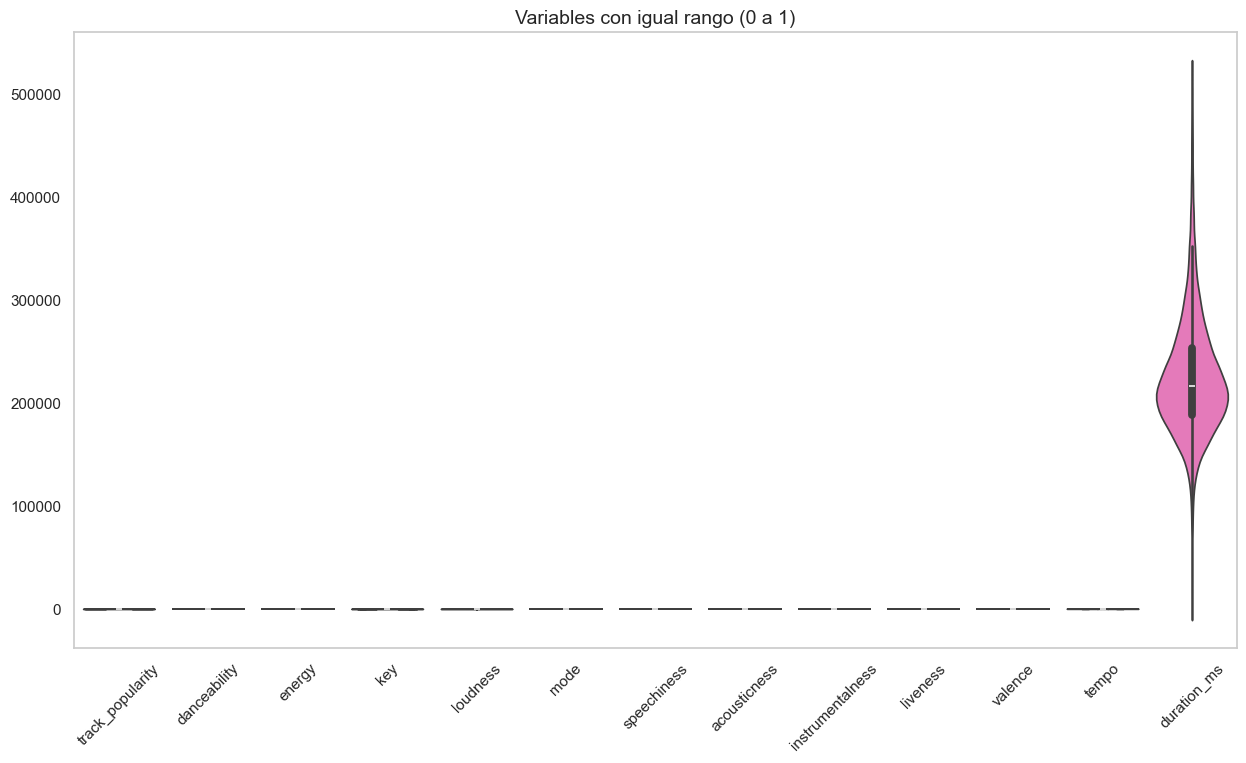

In [16]:
# Violin plot del dataset
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Decidimos separar las variables 'duration_ms', 'tempo' y 'track_popularity' en violin plot diferentes por tener un rango diferente que impide la visualización.

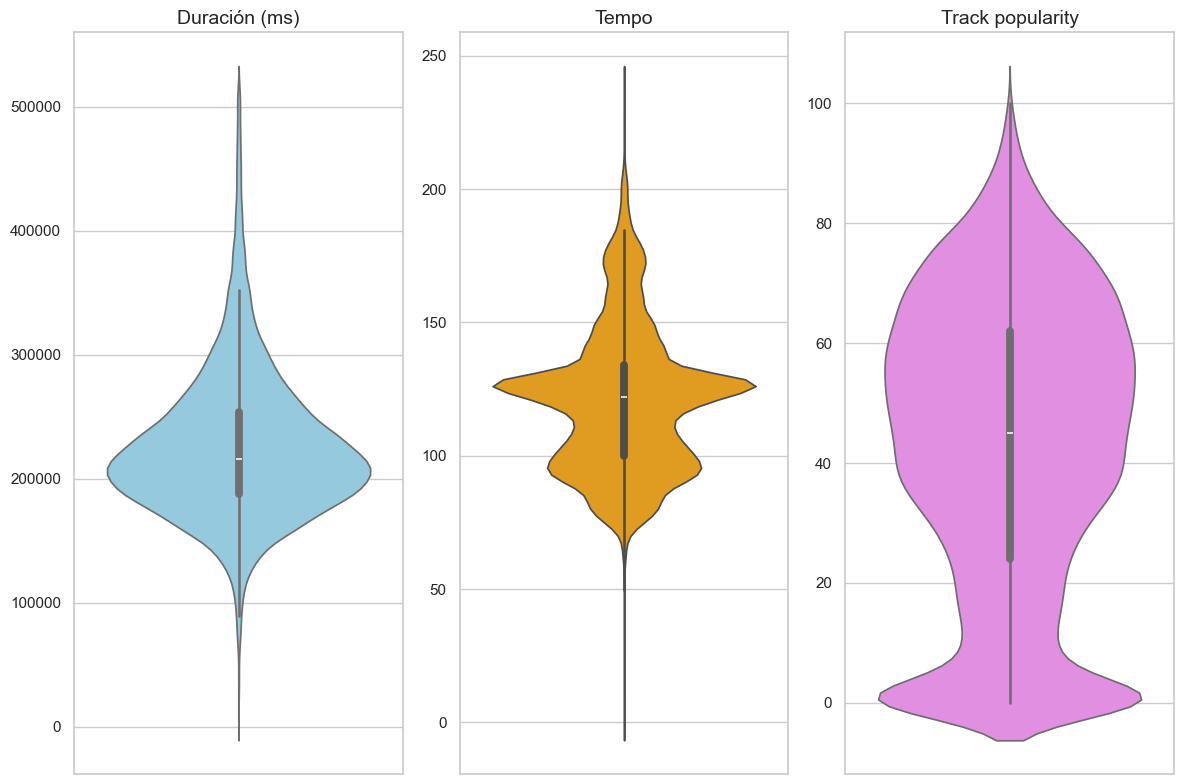

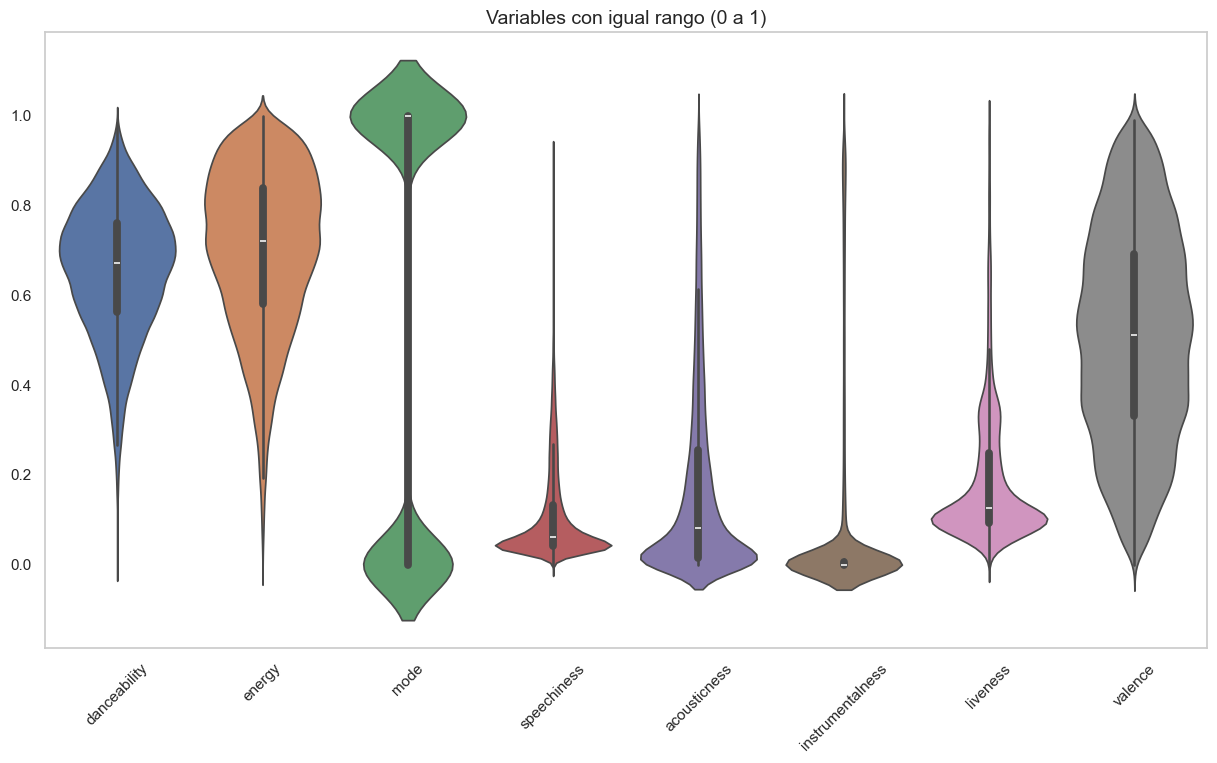

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

# Primer subplot (fila 0, columna 0)
sns.violinplot(ax=axes[0], data=df['duration_ms'], color='skyblue')
axes[0].set_title('Duración (ms)', fontsize=14)
axes[0].set_ylabel('')

# Segundo subplot (fila 0, columna 1)
sns.violinplot(ax=axes[1], data=df['tempo'], color='orange')
axes[1].set_title('Tempo', fontsize=14)
axes[1].set_ylabel('')

# Tercer subplot (fila 1, columna 0)
sns.violinplot(ax=axes[2], data=df['track_popularity'], color='violet')
axes[2].set_title('Track popularity', fontsize=14)
axes[2].set_ylabel('')
# Ajustar el layout para que los subplots no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot( data=df.drop(['duration_ms','tempo','track_popularity','loudness','key'],axis=1))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

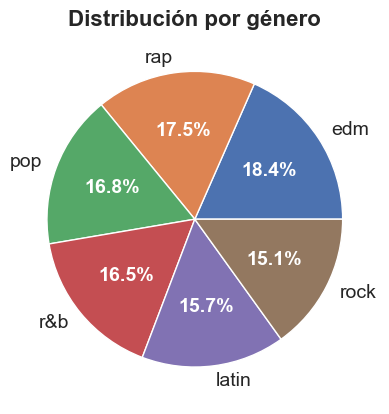

In [18]:
# Estudiamos la distrubición por género
sample = df.groupby('playlist_genre').agg({'track_id': 'count'}).rename(columns={'track_id': 'track_count'}).sort_values(by='track_count', ascending=False)
track_counts = sample['track_count']

wedges, texts, autotexts = plt.pie(
    track_counts,
    labels=sample.index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}  # Aumenta el tamaño del texto
)

# Aplicar estilos a los porcentajes (autotexts)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Distribución por género', fontsize=16, fontweight='bold')
plt.show()

El dataset se encuentra distribuido uniformemente para cada género.

In [19]:
"""genres = sample.index.to_list()
subgenres = sample.index.to_list()"""

In [128]:
def año_lanzamiento(date):
    if len(date) == 4:
        año = date
        return año
    else:
        año = pd.to_datetime(date, errors='coerce').year
        return año

In [129]:
df['year'] = df['track_album_release_date'].apply(año_lanzamiento)

2012
1998
1996
1999
1993
1996
1991
1998
2000
1994
1994
2007
2000
2007
1999
1998
1994
1994
1994
1996
1999
1994
1995
2003
1994
2000
2019
2011
2010
2011
2011
2012
2008
2014
2008
2012
2007
2014
2009
2013
2012
1988
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2008
2009
2009
2008
2008
2005
2005
2009
2009
2009
2009
2004
2010
2011
1973
1977
1981
1981
1970
1976
2010
1987
1980
2011
1984
1976
1985
2004
2002
1999
2010
2009
2002
2002
2014
2008
2004
2013
1999
2001
2007
1995
2019
2016
2013
2011
2016
2010
2012
2013
2013
2002
2003
1984
1993
1981
1978
1978
1982
2008
2011
2006
2006
2006
2005
2006
2009
2009
2009
2009
1997
2007
2005
1983
1991
1987
2004
1986
1986
1979
2011
1989
1989
1990
1984
1981
1984
2010
2006
2011
2006
1984
1981
2009
2007
2006
2010
2008
2003
2000
2001
2001
1991
1987
2006
1975
1987
2004
1985
1986
1983
1981
1986
2006
1984
2009
2010
2013
2010
2013
2015
2013
2010
2015
2013
2012
2014
2015
1985
2014
2016
2016
2011
2011
2011
2004
2014
2015
2013
2010
2008
2012
2012
2017
2009
2015


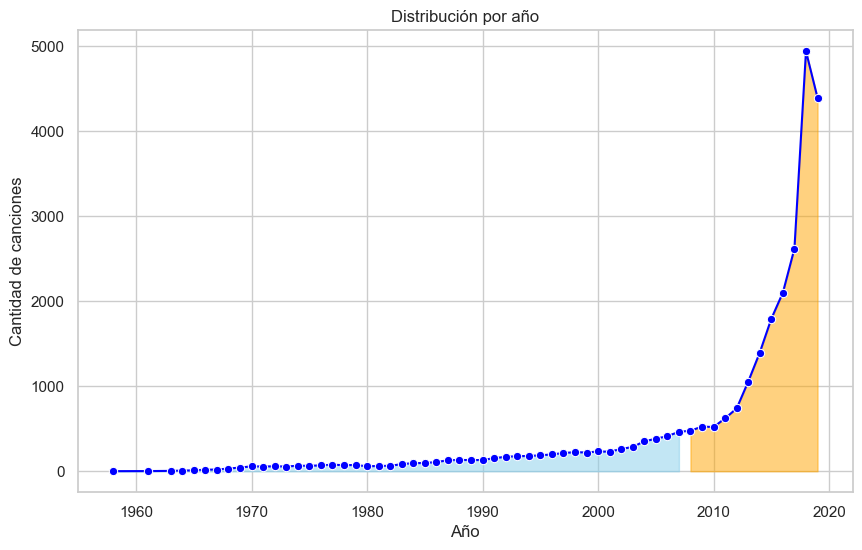

In [115]:
# Estudiamos la distribución de canciones por año
df['year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year

yearly_tracks = df['year'].value_counts().sort_index()
yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()

# Plotting the smoothed trend with annotations and color coding
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_tracks_smoothed.index, y=yearly_tracks_smoothed.values, marker='o', color='blue')
plt.title('Distribución por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.grid(True)

max_year = yearly_tracks.idxmax()
max_value = yearly_tracks.max()
plt.annotate(f'Maximum in {max_year}', xy=(max_year, max_value), xytext=(max_year-10, max_value + 500),
             arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index < 2008, color='skyblue', alpha=0.5)
plt.fill_between(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, where=yearly_tracks_smoothed.index >= 2008, color='orange', alpha=0.5)

plt.show()

Queda claro que a partir de 2010 la cantidad de canciones publicadas por año (en Spotify) aumenta notablemente.

Es importante destacar que la aplicación se encuentra disponible desde 2008.

Las canciones publicadas antes de este año podría estar sufriendo un sesgo de supervivencia (sólo se agregan las canciones que han perdurado).

In [132]:
df.sample(15)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
2687,06KyNuuMOX1ROXRhj787tj,We Don't Talk Anymore,Charlie Puth,79,5Nwsra93UQYJ6xxcjcE10x,Nine Track Mind,2016-01-29,ELECTROPOP,2UsEj2GUukV0GLbsE3rldz,pop,electropop,0.728,0.563,1,-8.053,0,0.1340,0.62100,0.000000,0.1790,0.352,100.017,217707,2016
28761,0NZqgkKllQXoFksQLBcEV9,Going Crazy,Hardwell,24,4ARCiF1HBrNxDV1ZrYWLDC,Going Crazy,2016-08-29,BIG-ROOM NEVER DIES !,4QtO2XySphMOJt7pX0yaVi,edm,big room,0.603,0.967,6,-2.723,1,0.1280,0.00765,0.000778,0.6410,0.235,127.925,182579,2016
26015,33zaP9mzOPm76Zf7HPGkaw,Bruised But Not Broken,Joss Stone,36,6Z8HL0drVRDIGrqIrSM1Ad,The Best Of Joss Stone 2003 - 2009,2011-01-01,NEO FUNK AND SOUL,2WbTrS5D0V2TW6DiDkJBru,r&b,neo soul,0.605,0.656,1,-7.808,1,0.1000,0.46900,0.000000,0.1220,0.577,76.477,256973,2011
14001,5z6xHjCZr7a7AIcy8sPBKy,Smooth Criminal,Alien Ant Farm,72,5klPnHQ5dy6Qm2Ul7h1lp5,Anthology,2001-01-01,Permanent Wave,2ExyzXAbukW7I8bDqdGvPB,rock,permanent wave,0.653,0.964,9,-4.261,0,0.0582,0.00316,0.005120,0.1440,0.870,126.928,209267,2001
7910,0mMmhuNtbJalQCZy5VhVwk,GATman And Robbin,50 Cent,0,6djlUHJRvmKU4TpgOAhmRA,The Massacre (Ecopac Reissue Explicit),2005-03-03,Hip-Hop 'n RnB,0275i1VNfBnsNbPl0QIBpG,rap,southern hip hop,0.692,0.911,4,-6.402,0,0.1720,0.38200,0.000007,0.1610,0.629,174.016,226441,2005
23546,1lDPD85vlOjj4WmhSrpswH,Get Lucky,The Beef Seeds,0,7r3AaWzndFKa1PUYrck1RN,Rhythm and Moos,2014-05-01,Bluegrass Covers,37i9dQZF1DX56crgoe4TG3,r&b,hip pop,0.821,0.932,6,-4.853,0,0.1080,0.46600,0.000000,0.4060,0.780,117.490,209362,2014
12503,5PHGTeEdFxTEb4hepxug86,Turn! Turn! Turn! (To Everything There Is a Se...,The Byrds,42,4lkNuTe5xkDTGS4a55R8mC,The Essential Byrds,1965,Classic Rock,5BygwTQ3OrbiwVsQhXFHMz,rock,classic rock,0.449,0.811,2,-8.170,1,0.0458,0.11700,0.000023,0.0393,0.736,124.594,229533,1965
8924,4WGv2uh5zowr2IHKVwLcQ2,Krokodil,Sa4,41,1Ql59l5ktSAPyS8q2mYUdZ,Neue deutsche Quelle,2017-11-10,Gangster Rap Deutsch,1qXg9ck25tBRxeXsj8mbDG,rap,gangster rap,0.669,0.682,1,-4.878,1,0.3320,0.07660,0.000286,0.2010,0.246,174.089,150975,2017
1733,2qT1uLXPVPzGgFOx4jtEuo,no tears left to cry,Ariana Grande,83,3tx8gQqWbGwqIGZHqDNrGe,Sweetener,2018-08-17,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,post-teen pop,0.699,0.713,9,-5.507,0,0.0594,0.04000,0.000003,0.2940,0.354,121.993,205920,2018
32054,3GQoCeZqEjRwyXwwNe1IxK,On My Mind,Galactus Jack,24,6V9qL61ImjVZpenAphC64a,Younger Days,2018-06-15,CHRISTIAN ELECTRO / DANCE / EDM,0MhTMIo1bgH6zzPh7BdChT,edm,progressive electro house,0.649,0.711,5,-5.725,1,0.0656,0.11400,0.000058,0.3840,0.797,150.006,172734,2018


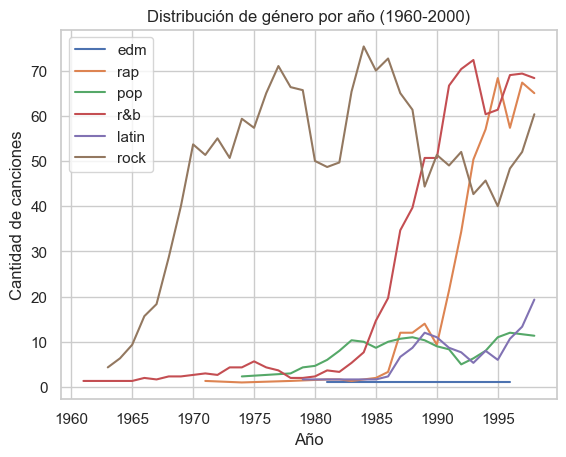

In [86]:
#Distribución de género por año
df_yr = df[df['year'] < 2000]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de género por año (1960-2000)')
#plt.yscale('log')
plt.legend()
plt.show()


Puede verse la evolución de los distintos géneros a través de los años.

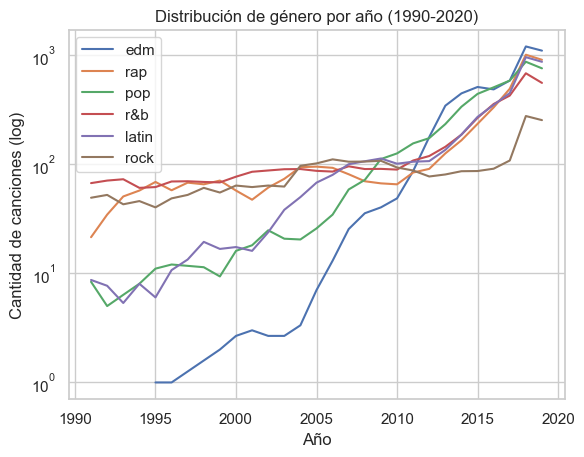

In [90]:
#Distribución de género por año
df_yr = df[df['year'] >= 1990]

for i in genres:
    sample = df_yr[df_yr['playlist_genre'] == i]
    yearly_tracks = sample['year'].value_counts().sort_index()
    yearly_tracks_smoothed = yearly_tracks.rolling(window=3, center=True).mean()
    yearly_tracks_smoothed = yearly_tracks_smoothed.dropna()
    plt.plot(yearly_tracks_smoothed.index, yearly_tracks_smoothed.values, label=i)

# Añadir etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de canciones (log)')
plt.title('Distribución de género por año (1990-2020)')
plt.yscale('log')
plt.legend()
plt.show()

Es destacable el surgimiento del género 'edm' a partir 1995 y el declino del 'rock' a partir de 2010.

En 2017 se produce un incremento similar de la cantidad de canciones en todos los géneros.

## Limpieza del Dataset

### Identificación de valores nulos

In [133]:
# Vemos la cantidad de valores nulos por cada campo
df.isnull().sum()

track_id            0
track_name          5
track_artist        5
track_popularity    0
track_album_id      0
                   ..
liveness            0
valence             0
tempo               0
duration_ms         0
year                0
Length: 24, dtype: int64

Se identifican 5 pistas que no tienen información de 'track_name' y 'track_artist', posiblemente se trata de las mismas canciones.

In [134]:
# filtramos para ver los registros con valores nulos
null_data = df[df.isnull().any(axis=1)]
null_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,southern hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.678,0.659,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235,2017
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,gangster rap,0.465,0.820,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465,2017
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,reggaeton,0.675,0.919,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773,2012
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,latin hip hop,0.714,0.821,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707,2012


Se observó que los features musicales tenían valores normales en relación al resto del dataset. Por ese motivo se decidió conservar estas canciones.

### Tratamiento de duplicados

Verificamos si había canciones ingresadas más de una vez al dataset (mismo track_id) y eliminamos los duplicados.

In [26]:
# Búsqueda de duplicados
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

track_id
7BKLCZ1jbUBVqRi2FVlTVw    10
3eekarcy7kvN4yt5ZFzltW     9
14sOS5L36385FJ3OL8hew4     9
7LzouaWGFCy4tkXDOOnEyM     8
2b8fOow8UzyDFAE27YhOZM     8
                          ..
6wVViUl2xSRoDK2T7dMZbR     2
3W6WaJa1wRQfbhqotaHtyM     2
7hDVN6GisA47ym0H93NA1Z     2
3F8aTQzmKovktFcR7MCGFW     2
6Nabz5Gsy80XL0MJoOmgF8     2
Name: count, Length: 3166, dtype: int64


In [146]:
df.loc[df['track_id'] == '7BKLCZ1jbUBVqRi2FVlTVw']

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
133,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,dance pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
1731,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Post pop teen,222nc9tKxKhfZ2GBrOpwH3,pop,post-teen pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
2478,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Electropop Hits 2017-2020,7kyvBmlc1uSqsTL0EuNLrx,pop,electropop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
4535,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,indie poptimism,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
7369,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,◤ Hip Hop Dance Music – Urban – Trap – Breakin...,0Hr2h94pKN8QAGVAgD6BsD,rap,southern hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
17467,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,Tropical House Run 190 BPM,37i9dQZF1DWSTc9FdySHtz,latin,tropical,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
18358,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
19770,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,latin,latin hip hop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
23784,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,4JkkvMpVl4lSioqQjeAL0q,r&b,hip pop,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016
30629,7BKLCZ1jbUBVqRi2FVlTVw,Closer (feat. Halsey),The Chainsmokers,85,0rSLgV8p5FzfnqlEk4GzxE,Closer (feat. Halsey),2016-07-29,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,pop edm,0.748,0.524,8,-5.599,1,0.0338,0.414,0.0,0.111,0.661,95.01,244960,2016


Pudimos ver que las entradas duplicadas están en diferentes playlists, pero se trata siempre de la misma canción, con los mismos features musicales.

El único valor conflictivo es 'playlist_genre' ya que no necesariemente es descriptivo del género real de la canción. Decidimos conservar sólo la primer entrada a modo descriptivo.

In [27]:
# Eliminación de duplicados
df = df.drop_duplicates(subset='track_id', keep='first')

In [28]:
# Verificación
duplicate_counts = df['track_id'].value_counts()[df['track_id'].value_counts() > 1]
print(duplicate_counts)

Series([], Name: count, dtype: int64)


### Tratamiento de outliers

#### Variable track_popularity

In [29]:
# Verificamos la cantidad de canciones con track_popularity igual a 0
unpopular_counts = df['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 28356, dtype: bool


2620

Identificamos que la presencia de gran cantidad de canciones con valor 0 de 'track_popularity'. Luego de explorar el dataset pensamos que puede deverse a que esas canciones no han recibido suficientes escuchas para establecer su popularidad, lo cual puede deberse a factores externos (ej. falta de promoción, artista desconocido) que exceden la información del presente dataset, en particular a las variables musicales con las que se intenta verificar si existe una correlación.

In [30]:
# Eliminamos las canciones con track_popularity igual a 0
#df_subset = df[(df['track_popularity'] < 30) & (df['track_popularity'] > 5)]
df_subset = df[df['track_popularity'] > 10]

### EXTRA ###

In [31]:
# Verificamos la eliminación de canciones con track_popularity igual a 0
unpopular_counts = df_subset['track_popularity'] == 0
print(unpopular_counts)
unpopular_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: track_popularity, Length: 23196, dtype: bool


0

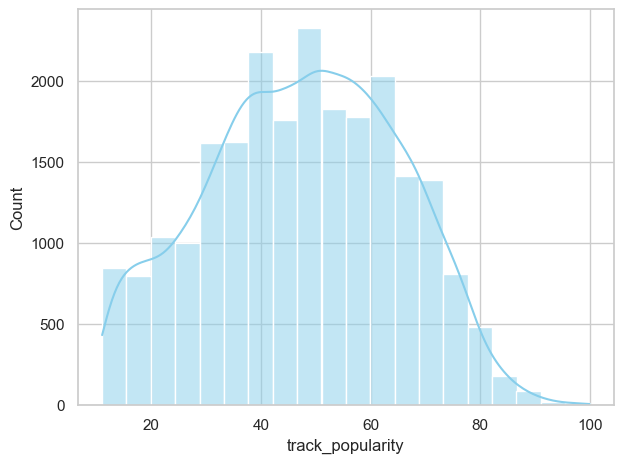

In [32]:
# Graficamos la distribución del campo track_popularity
sns.histplot(data=df_subset, x='track_popularity', bins=20, kde=True, color="skyblue")
plt.tight_layout()  # Ajustar layout para evitar solapamientos
plt.show()

### EXTRA ###

In [33]:
df = df_subset

#### Variable tempo

In [34]:
# Verificamos la cantidad de canciones con tempo igual a 0
zerotempo_counts = df['tempo'] < 30
print(zerotempo_counts)
zerotempo_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: tempo, Length: 23196, dtype: bool


0

In [35]:
# Eliminamos las canciones con tempo igual a 0
df =  df[df['tempo'] > 0]

In [36]:
# Verificamos la eliminación de canciones con tempo igual a 0
zerotempo_counts = df['tempo'] == 0
print(zerotempo_counts)
zerotempo_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: tempo, Length: 23196, dtype: bool


0

#### Variable duracion_ms

In [37]:
# Verificamos la cantidad de canciones con duración menor a 30 seg
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 23196, dtype: bool


0

In [38]:
# Eliminamos las canciones con duración menor a 30 seg
df = df[df['duration_ms'] >= 30000]

In [39]:
# Verificamos la eliminación de canciones con duración menor a 30 seg
zeroduration_counts = df['duration_ms'] < 30000
print(zeroduration_counts)
zeroduration_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: duration_ms, Length: 23196, dtype: bool


0

#### Variable loudness

In [40]:
# Verificamos la cantidad de canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23196, dtype: bool


5

In [41]:
# Eliminamos las canciones con loudness menor a -30 dB
df = df[df['loudness'] > -30]

In [42]:
# Verificamos la eliminacion de las canciones con loudness menor a -30 dB
low_loudness_counts = df['loudness'] < -30
print(low_loudness_counts)
low_loudness_counts.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
32828    False
32829    False
32830    False
32831    False
32832    False
Name: loudness, Length: 23191, dtype: bool


0

In [43]:
df_bu = df

## Tests filtrando dataset

In [44]:
df = df_bu

In [45]:
# Eliminamos las canciones anteriores a 2010
df = df[df['year'] >= 1990]

### EXTRA ###

In [46]:
# Filtrando por género
#df = df[df['playlist_genre'] == 'edm']
#df = df[df['playlist_genre'] == 'rap']
#df = df[df['playlist_genre'] == 'pop']
#df = df[df['playlist_genre'] == 'r&b']
#df = df[df['playlist_genre'] == 'latin']
#df = df[df['playlist_genre'] == 'rock']

In [47]:
#LIMITES
# danceability: > 0.5 -> bailable
# speechiness: > 0.66 -> speech
# acousticness: > 0.5 -> acoustic 
# intstrumentalness: > 0.5 -> intstrumental 
# liveness: > 0.8 -> live 
# valence: 1 = positiva / 0 = negativa

"""
df.loc[:, 'danceability'] = df['danceability'] > 0.5
df.loc[:, 'speechiness'] = df['speechiness'] > 0.66
df.loc[:, 'acousticness'] = df['acousticness'] > 0.5
df.loc[:, 'instrumentalness'] = df['instrumentalness'] > 0.5  # Corregido el nombre de la columna
df.loc[:, 'liveness'] = df['liveness'] > 0.8
df.loc[:, 'valence'] = df['valence'] > 0.5
"""

"\ndf.loc[:, 'danceability'] = df['danceability'] > 0.5\ndf.loc[:, 'speechiness'] = df['speechiness'] > 0.66\ndf.loc[:, 'acousticness'] = df['acousticness'] > 0.5\ndf.loc[:, 'instrumentalness'] = df['instrumentalness'] > 0.5  # Corregido el nombre de la columna\ndf.loc[:, 'liveness'] = df['liveness'] > 0.8\ndf.loc[:, 'valence'] = df['valence'] > 0.5\n"

## Transformación de Variables y Selección de Features

In [48]:
# Escalado loudness
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['track_popularity','loudness','tempo','duration_ms','year']] = scaler.fit_transform(df[['track_popularity','loudness','tempo','duration_ms','year']])
df_scaled.describe()

### EXTRA ###

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year
count,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.00000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000,20689.000000
mean,0.409877,0.662215,0.694449,5.353280,0.763399,0.553628,0.11219,0.183464,0.090253,0.188679,0.497192,0.462514,0.384717,0.814230
std,0.197400,0.142486,0.182440,3.616814,0.094223,0.497128,0.10427,0.226978,0.233666,0.152111,0.230690,0.146656,0.116097,0.228451
min,0.000000,0.077100,0.008140,0.000000,0.000000,0.000000,0.02240,0.000001,0.000000,0.009360,0.000010,0.000000,0.000000,0.000000
25%,0.269663,0.572000,0.578000,2.000000,0.717521,0.000000,0.04240,0.015800,0.000000,0.093700,0.318000,0.348905,0.313055,0.766667
50%,0.415730,0.679000,0.717000,6.000000,0.779490,1.000000,0.06610,0.085300,0.000013,0.126000,0.497000,0.468207,0.368129,0.900000
75%,0.561798,0.765000,0.837000,8.000000,0.828407,1.000000,0.14300,0.271000,0.004730,0.242000,0.677000,0.533985,0.437649,0.966667
max,1.000000,0.983000,1.000000,11.000000,1.000000,1.000000,0.91800,0.992000,0.994000,0.996000,0.991000,1.000000,1.000000,1.000000


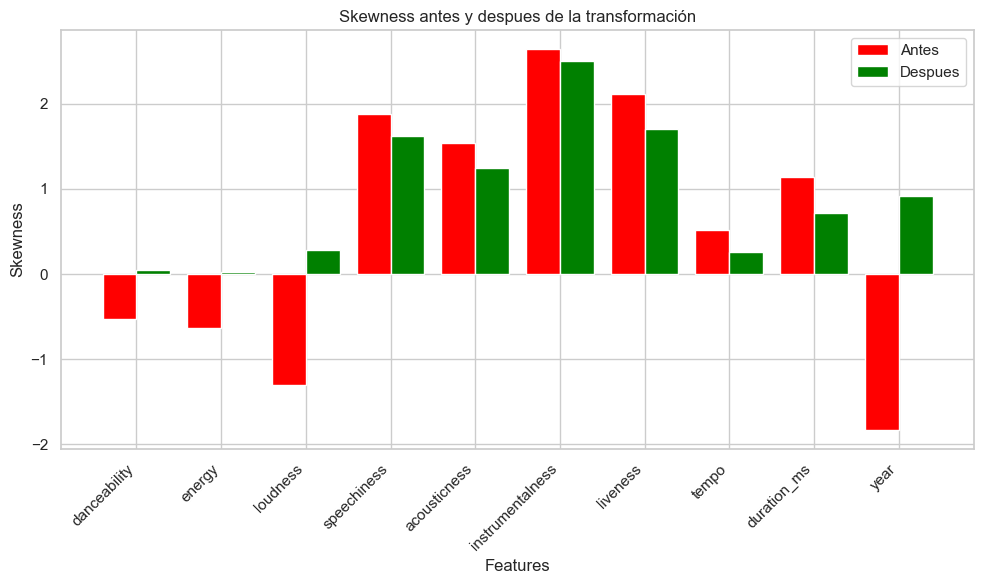

In [49]:
skew_df = pd.DataFrame(columns=['feature', 'before', 'after', 'transformer'])


def remove_skewness(feature, df_scaled):
    
    skew = df_scaled[feature].skew()
    output = df_scaled[feature]
    row = [feature, skew, 0, 'None'] 
    transformers = [np.log1p, np.sqrt] if skew > 0 else [np.square, np.exp, lambda x: x**3]

    
    for transformer in transformers:
        sample = transformer(df_scaled[feature] + 1) if transformer == np.sqrt else transformer(df_scaled[feature])
        if abs(sample.skew()) < abs(skew):
            skew = abs(sample.skew())
            output = sample
            row[2] = skew  
            row[3] = transformer._name_ if hasattr(transformer, '_name_') else str(transformer)

    skew_df.loc[len(skew_df)] = row
    return output

categorical_feat = []
numerical_feat = []
#Separamos nuestro dataset entre variables numericas y categoricas
for col in df_scaled.columns:
  if df[col].dtype == 'object':
    categorical_feat.append(col)
  else:
    numerical_feat.append(col)
  

skewed_features = [feat for feat in numerical_feat if abs(df_scaled[feat].skew()) >= 0.5]
#Aplicamos el skew solo a las variables numericas
for feat in skewed_features:
  df_scaled[feat] = remove_skewness(feat, df_scaled)


fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = range(len(skew_df))
bars_before = ax.bar(index, skew_df['before'], bar_width, label='Antes', color='red')
bars_after = ax.bar([i + bar_width for i in index], skew_df['after'], bar_width, label='Despues', color='green')
ax.set_xlabel('Features')
ax.set_ylabel('Skewness')
ax.set_title('Skewness antes y despues de la transformación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(skew_df['feature'], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

In [50]:
df_scaled['key'] = df_scaled['key'].astype(int)

# Realizar el one-hot encoding para la variable key
one_hot_encoded = pd.get_dummies(df_scaled['key'], prefix='key')

# Creamos un nuevo DataFrame one-hot encoded para key
df_key = pd.concat([df_scaled, one_hot_encoded], axis=1)

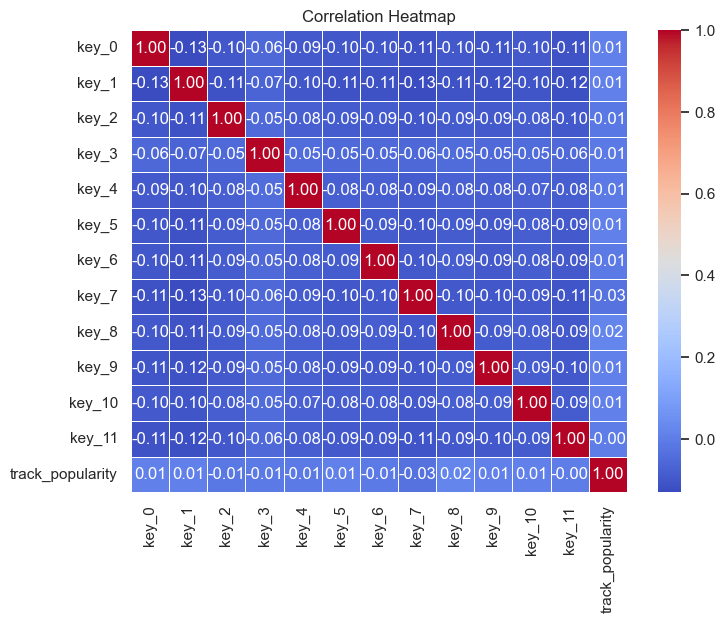

In [51]:
subset = []
subset = df_key[[col for col in df_key.columns if col.startswith('key_')] + ['track_popularity']]

# Calculate the correlation matrix
corr_matrix = subset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Dado que la tonalidad key no tiene correlación con track_popularity será desestimada.

In [52]:
df_scaled.drop(columns=['key'], inplace=True)

In [53]:
# Aplicar One Hot Encoding a la variable playlist_genre
df_scaled = pd.get_dummies(df_scaled, columns=['playlist_genre'], prefix='genre')

### EXTRA ###

In [54]:
# Eliminando las canciones con tempo más bajo por encontrarse desbalanceadas
df_scaled = df_scaled[df_scaled['tempo'] >= 0.2]

### EXTRA ###

In [55]:
"""
sns.pairplot(df_scaled)
plt.show()
"""

'\nsns.pairplot(df_scaled)\nplt.show()\n'

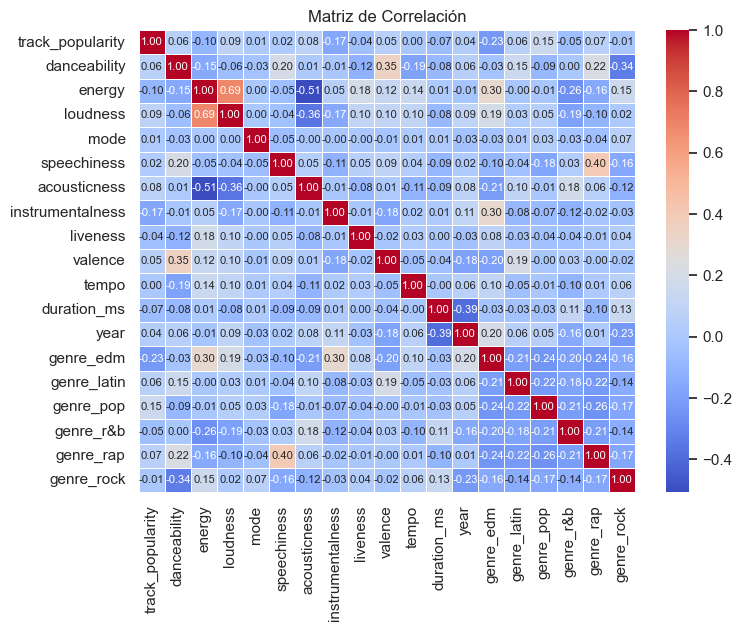

In [56]:
# Seleccionar solo columnas numéricas
numeric_df = df_scaled.select_dtypes(include=['number', 'bool'])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Crear un gráfico de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8}, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

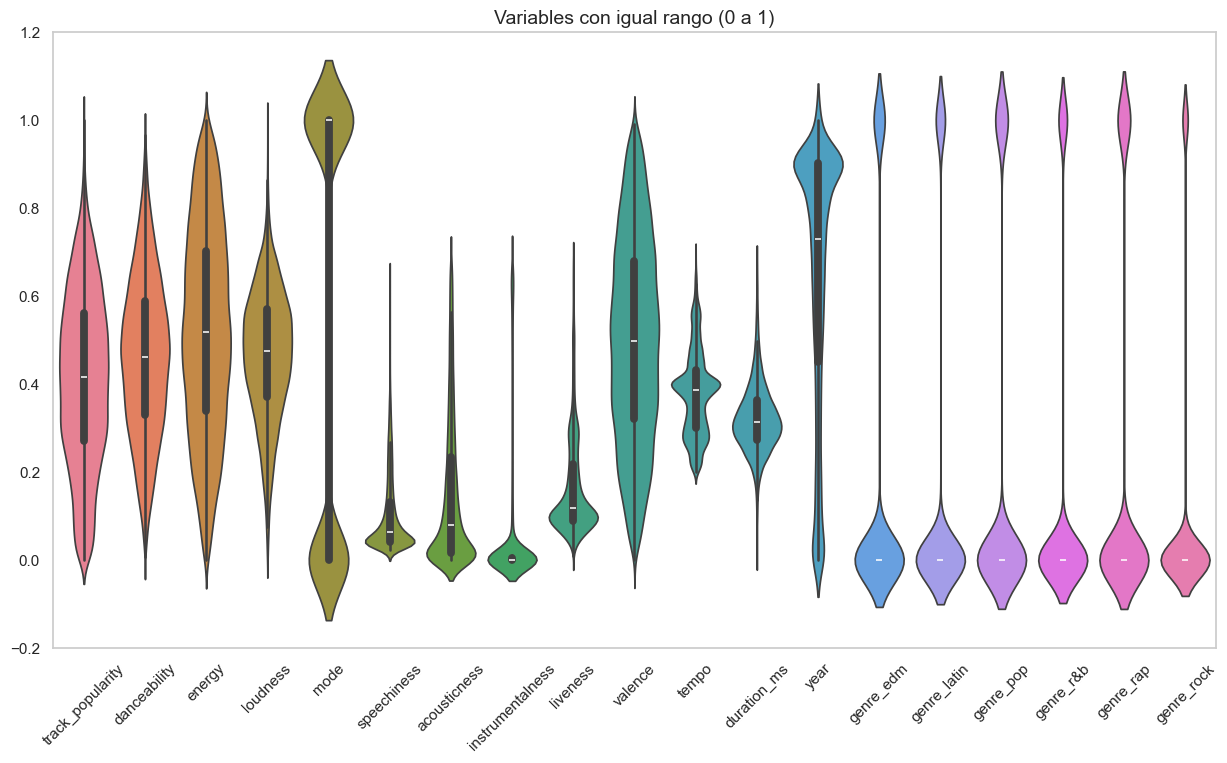

In [57]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df_scaled)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

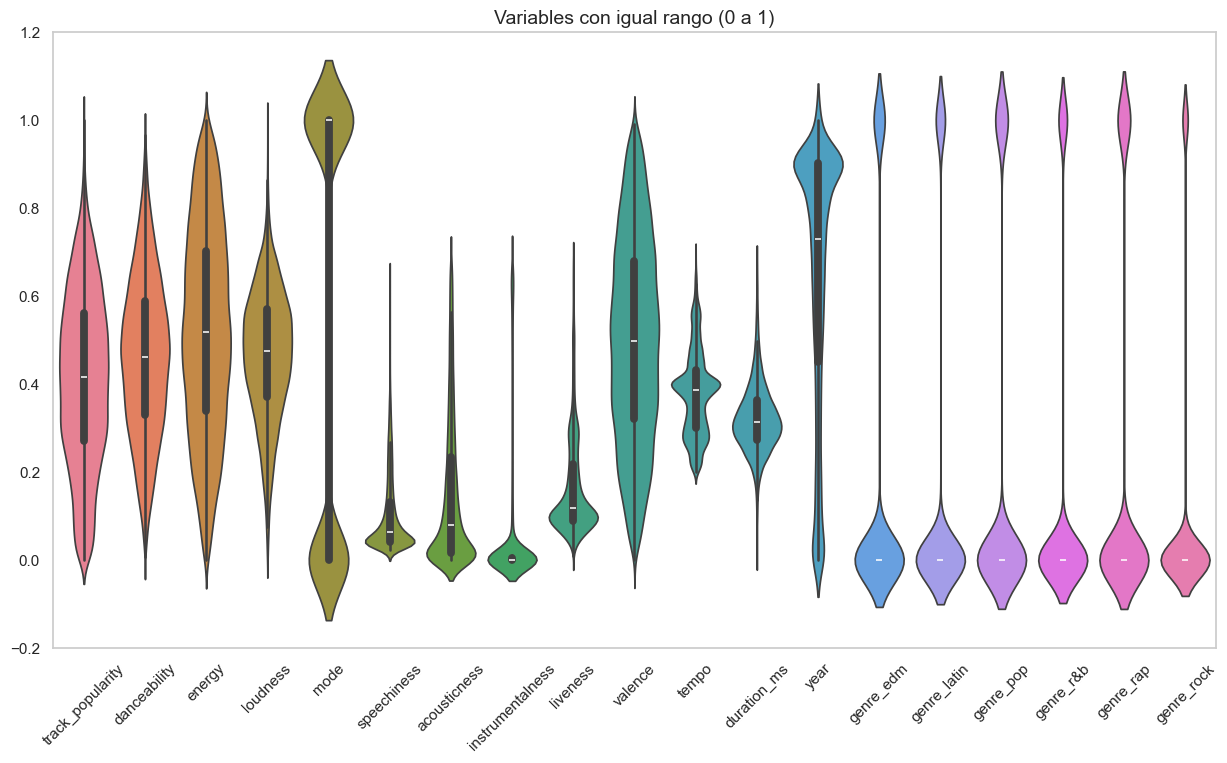

In [58]:
# Violin plot para variables con igual rango (0 a 1)
plt.figure(figsize=(15, 8))
plt.title('Variables con igual rango (0 a 1)', fontsize=14)
sns.violinplot(data=df_scaled)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Reducción de la Dimensionalidad